In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import mglearn

In [189]:
matplotlib.rcParams['font.family']='Malgun Gothic'   # 한글 사용
matplotlib.rcParams['axes.unicode_minus'] = False

In [190]:
activity = pd.read_csv('train_activity.csv')
label = pd.read_csv('train_label.csv')
# payment = pd.read_csv('train_payment.csv')
# trade = pd.read_csv('train_trade')
# pledge = pd.read_csv('train_pledge')


In [191]:
activity_g = activity.groupby(['char_id','acc_id' ],as_index=False).sum() # groupby 한 다음에 index 분리
activity_g.drop(columns = 'day', inplace = True)
# activity_g

In [192]:
label_new = pd.merge(activity_g, label, how = 'inner', on = 'acc_id')
label_new.drop(columns = 'amount_spent', inplace = True)
activity_new = label_new.set_index('char_id')
# activity_new
activity_new.columns

Index(['acc_id', 'playtime', 'npc_kill', 'solo_exp', 'party_exp', 'quest_exp',
       'boss_monster', 'death', 'revive', 'exp_recovery', 'fishing',
       'private_shop', 'game_money_change', 'enchant_count', 'survival_time'],
      dtype='object')

In [201]:
activity_new2 = activity_new.drop(columns = ['acc_id', 'solo_exp', 'party_exp', 'quest_exp' , 'npc_kill','boss_monster',
                                             'death', 'revive', 'exp_recovery',
                                            'game_money_change', 'enchant_count'])

In [202]:
for i in range(65):
    activity_new2.loc[activity_new2['survival_time'] == i, 'new_sur'] = i * 0.1

In [203]:
activity_new2 = activity_new2.drop(columns = ['survival_time'])

In [204]:
print(activity_new2)

          playtime    fishing  private_shop  new_sur
char_id                                             
2         0.123246   0.000000      0.000000      1.7
45347     0.502466   0.108789      0.000000      1.7
214226    6.676630   2.788803      0.000000      1.7
222936    3.659467   2.205042      0.000000      1.7
226612    0.026071   0.000000      0.000000      1.7
357848    1.180320   0.547419      0.000000      1.7
3         2.732749   0.000000      0.000000      6.4
110914    3.635765   0.000000      0.290024      6.4
198357   14.258647   0.000000      0.000000      6.4
229770    2.680607   0.000000      0.000000      6.4
259424    0.011851   0.000000      0.000000      6.4
267924   13.950531   5.162439      0.000000      6.4
290330    9.852592   0.000000      4.443582      6.4
351455    1.483696   0.000000      0.000000      6.4
378317    0.007110   0.000000      0.000000      6.4
5         1.012042   0.000000      0.000000      6.4
133086    0.011851   0.000000      0.000000   

In [223]:
data_point = activity_new2.values

In [224]:
kmeans = KMeans(n_clusters = 3).fit(data_point)

AttributeError: 'KMeans' object has no attribute 'cluster_cemters_'

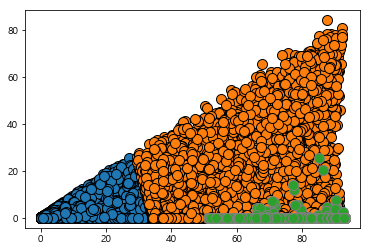

In [225]:
kmeans.labels_

In [208]:
activity_new2['cluster_id'] = kmeans.labels_

In [209]:
activity_new2.tail()

,playtime,fishing,private_shop,new_sur,cluster_id
char_id,,,,,
397208,37.452650,0.000000,0.000000,0.2,1
397296,7.382927,1.888631,0.000000,6.4,0
397337,2.069116,0.000000,0.000000,1.7,0
397348,92.797342,0.000000,85.466005,6.4,2
397379,0.793990,0.000000,0.000000,4.1,0


In [210]:
df1 = activity_new2[:5000]

In [215]:
df2 = df1[df1['new_sur']<6.4]

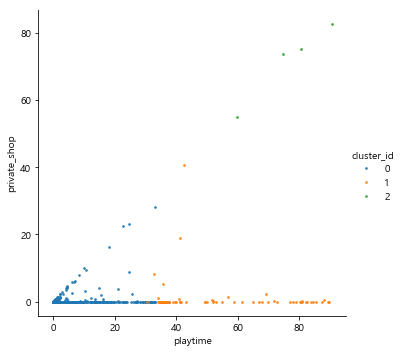

In [220]:
sns.lmplot( 'playtime','private_shop',data = df2, fit_reg = False, scatter_kws={'s':3},
          hue='cluster_id')